# Exploratory Data Analysis (EDA)

This notebook performs EDA on the Diabetic Retinopathy dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import sys

# Add project root to path to import src
sys.path.append(os.path.abspath('..'))
from src.config import NUM_CLASSES, IMG_SIZE

In [2]:
# 1. Load train.csv
df = pd.read_csv('../train.csv')
print(df.head())
print(f"Total images: {len(df)}")

        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0
Total images: 3662


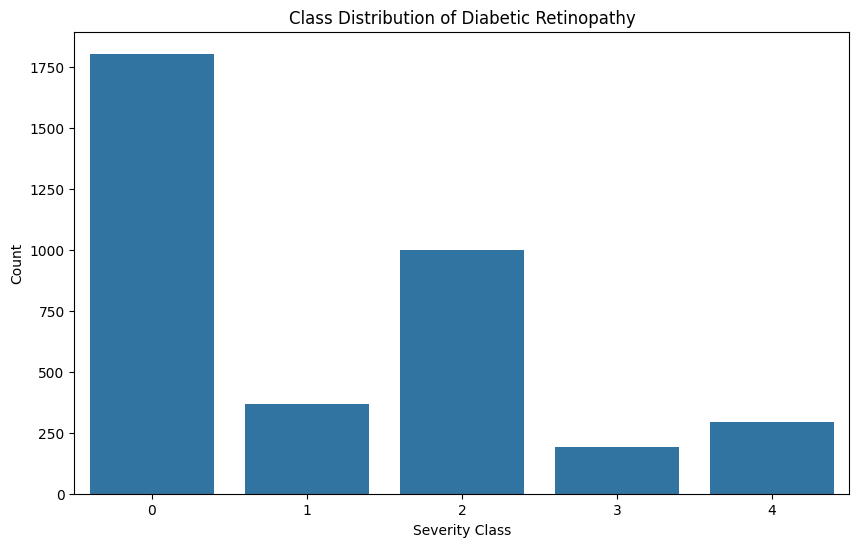

In [3]:
# 2. Visualize class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='diagnosis', data=df)
plt.title('Class Distribution of Diabetic Retinopathy')
plt.xlabel('Severity Class')
plt.ylabel('Count')
plt.savefig('../outputs/class_distribution.png')
plt.show()

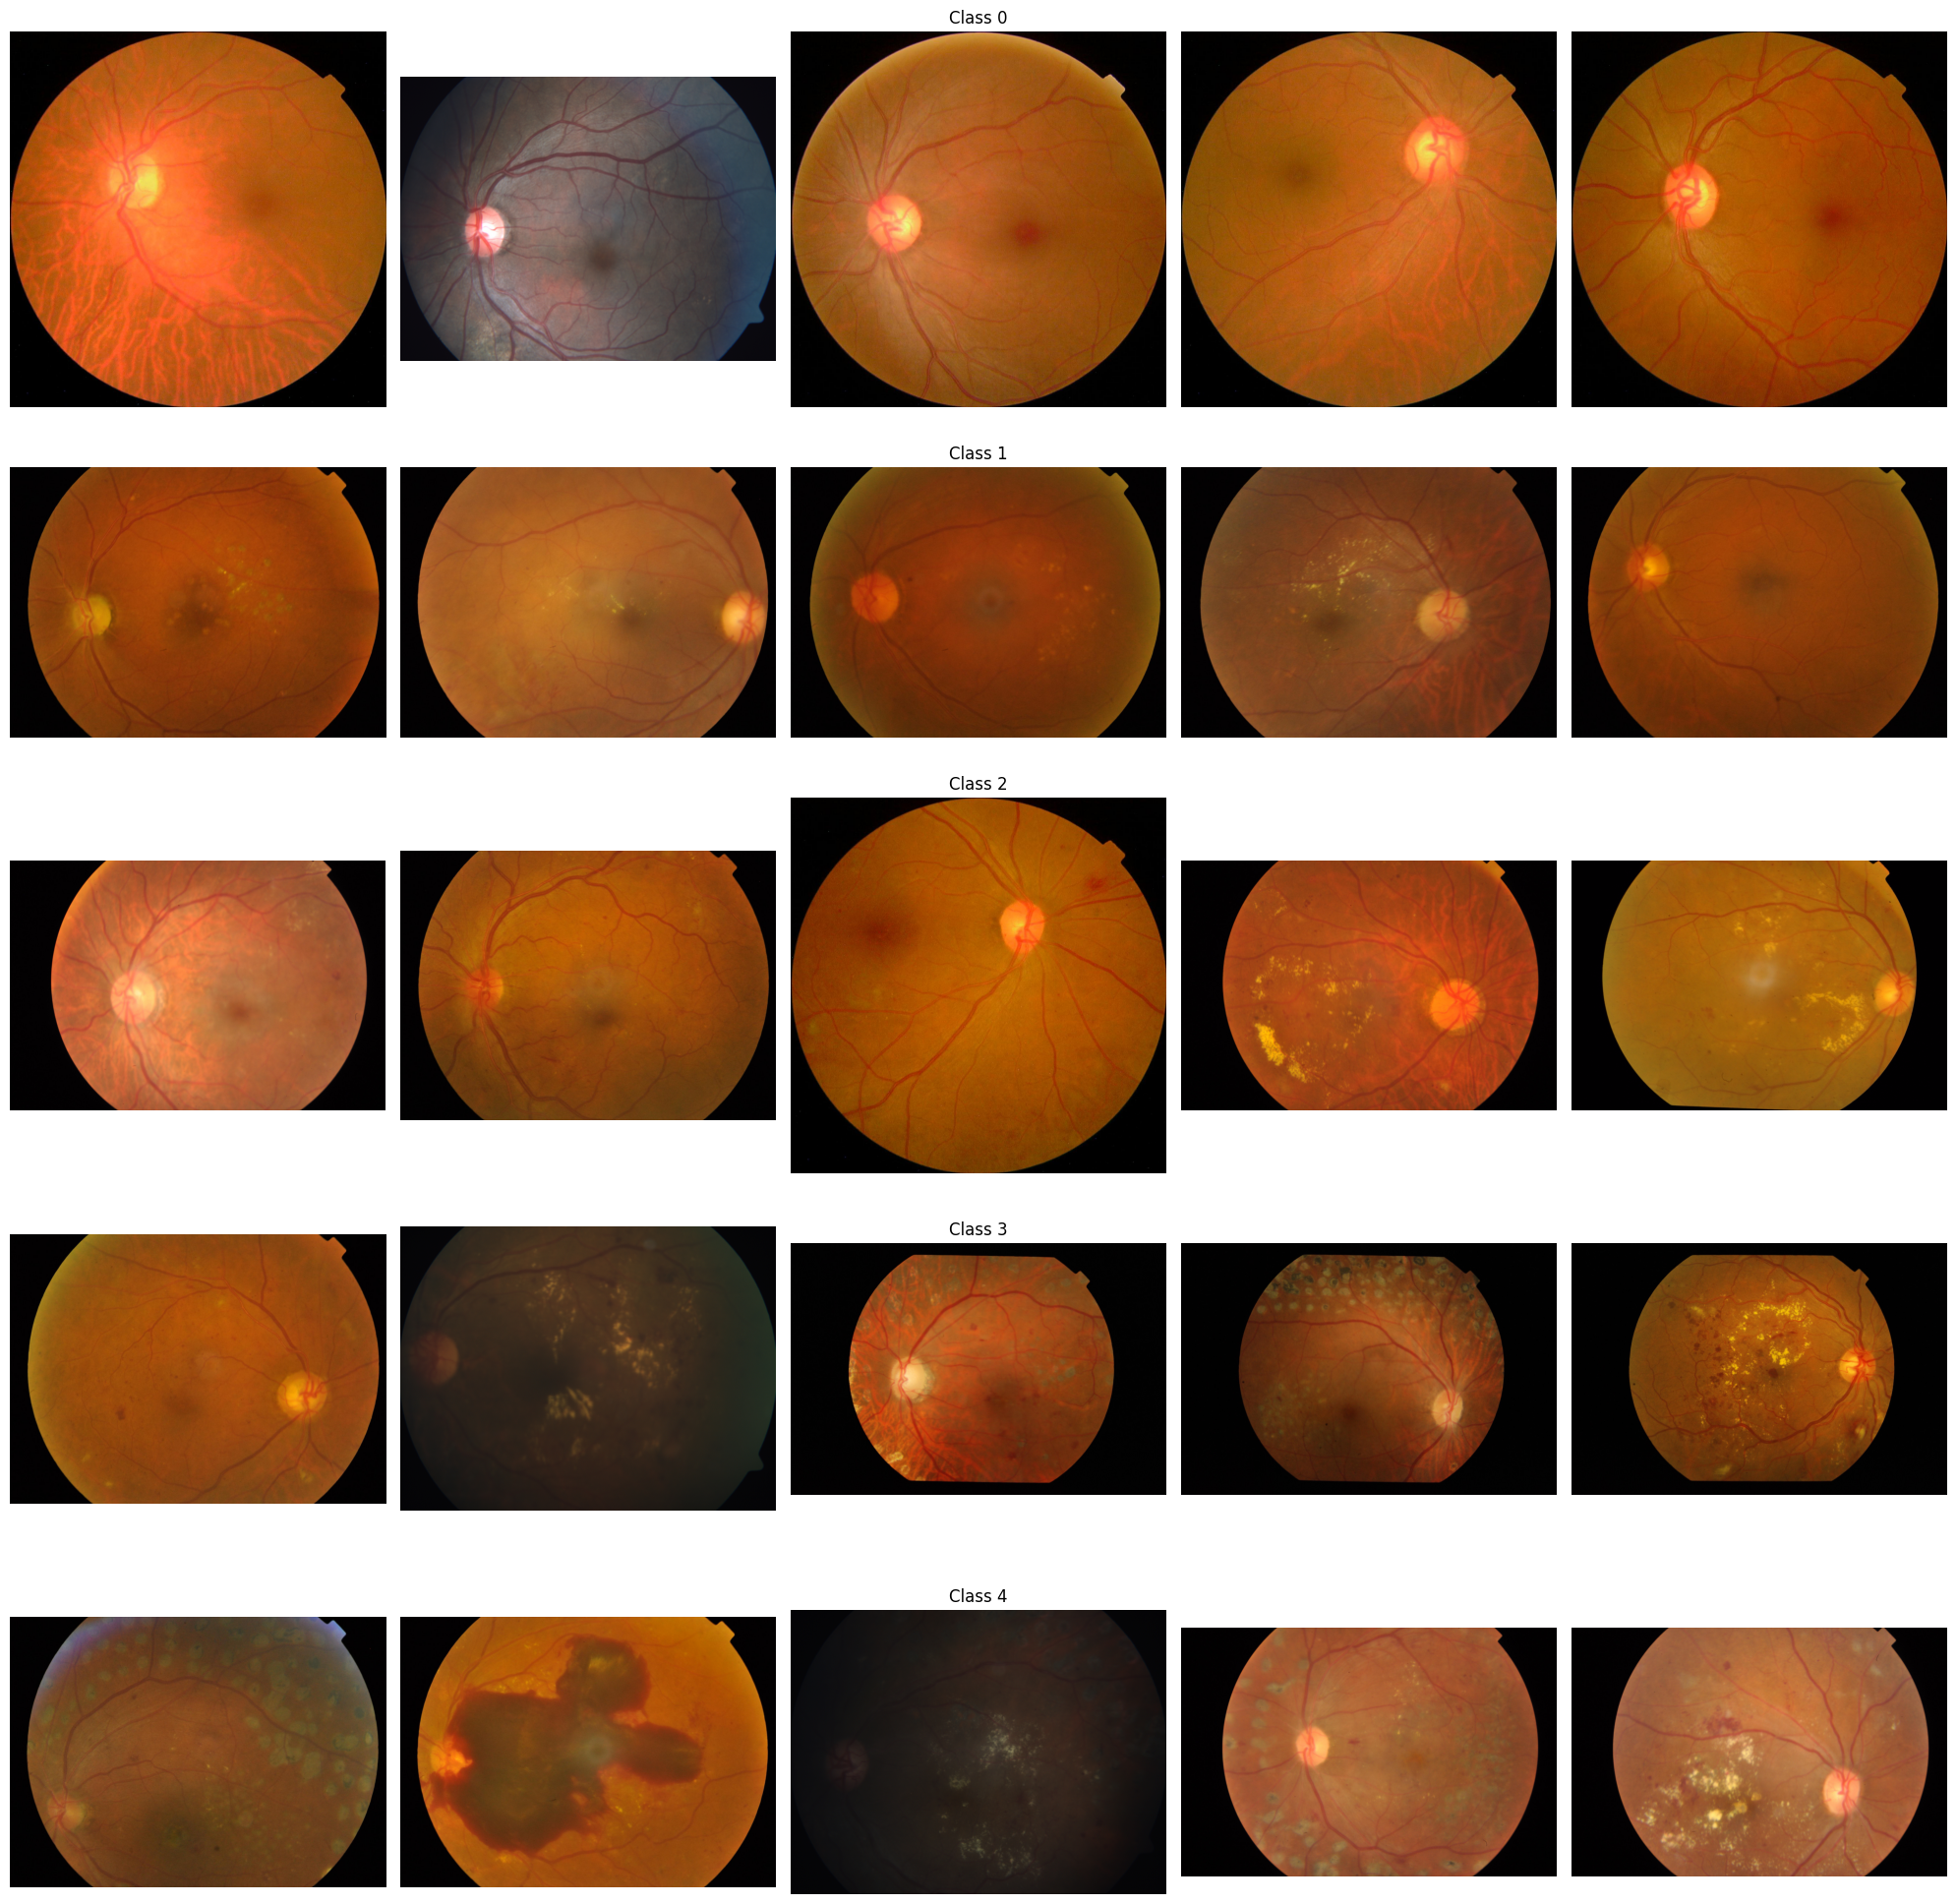

In [4]:
# 3. Display sample images
img_dir = '../data/train_images/'

fig, axes = plt.subplots(NUM_CLASSES, 5, figsize=(20, 20))

for i in range(NUM_CLASSES):
    class_df = df[df['diagnosis'] == i].sample(5, random_state=42)
    for j, (idx, row) in enumerate(class_df.iterrows()):
        img_name = row['id_code'] + '.png'
        img_path = os.path.join(img_dir, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axes[i, j].imshow(img)
        else:
            print(f"Could not load {img_path}")
        axes[i, j].axis('off')
        if j == 2:
            axes[i, j].set_title(f'Class {i}')

plt.tight_layout()
plt.show()